In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import math

import warnings
warnings.filterwarnings("ignore")

In [7]:
def plot_predictions(test, predicted):
    plt.plot(test, color="red", label="Real Natural Gas price")
    plt.plot(predicted, color="blue", label="Predicted Natural Gas price")
    plt.title("Natural Gas price prediction")
    plt.xlabel("Time")
    plt.ylabel("NG price")
    plt.legend()
    plt.show()

In [8]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

In [9]:
data = pd.read_csv(r'C:/Users/yaman/OneDrive/Documents/Projects 2023/Data Mining/Data.csv', index_col='Date', parse_dates=["Date"])

In [10]:
data.shape

(2961, 6)

In [11]:
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2011-12-14,171.9,175.4,176.2,171.4,46.51K,2.50%
2011-12-15,168.9,171.6,172.0,167.1,70.29K,-1.75%
2011-12-16,165.4,168.4,168.4,163.5,52.03K,-2.07%
2011-12-17,165.8,166.0,166.0,165.0,1.68K,0.24%
2011-12-19,165.5,165.2,165.9,162.5,35.44K,-0.18%
...,...,...,...,...,...,...
2022-12-26,434.1,430.0,437.0,422.2,3.45K,0.86%
2022-12-27,429.1,436.5,439.7,421.0,7.06K,-1.15%
2022-12-28,385.2,419.4,419.4,377.2,68.12K,-10.23%


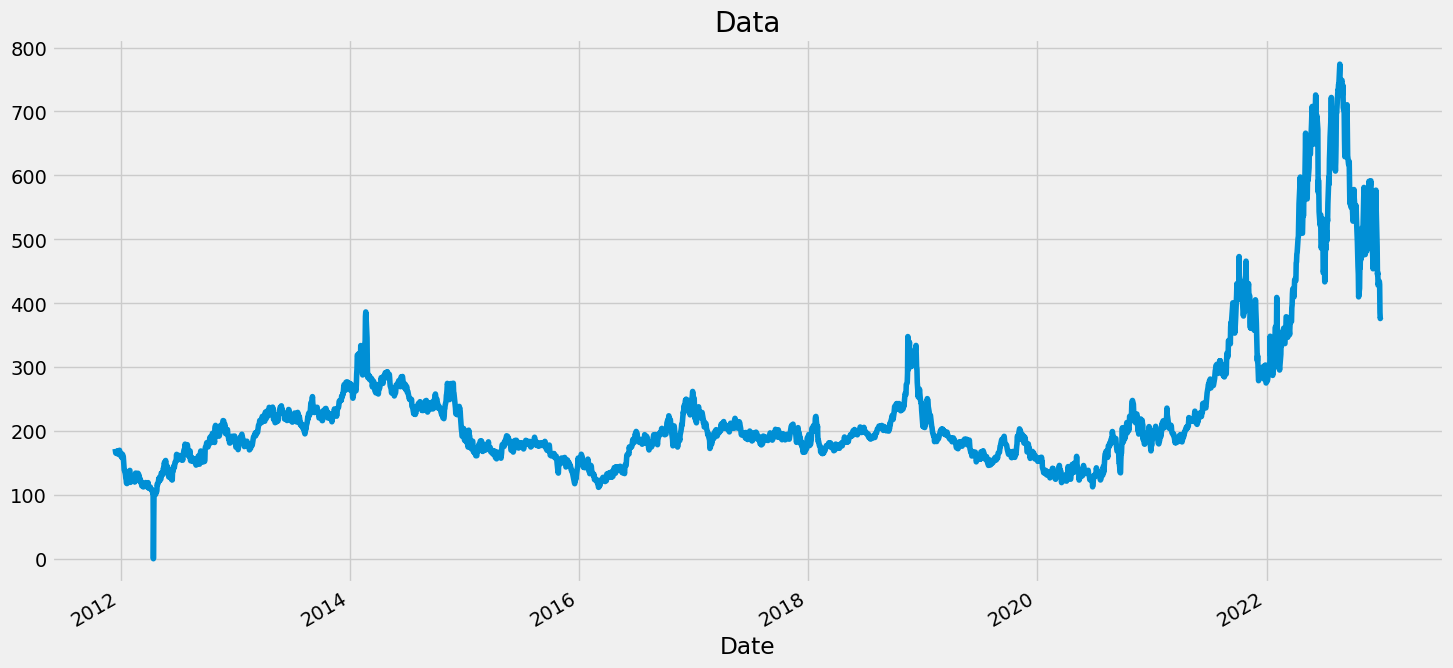

In [12]:
data["Price"].plot(figsize=(16,8))
plt.title("Data")
plt.show()

In [13]:
train = data[:'2019-07-18'].iloc[:,1:2].values
test = data['2019-07-19':].iloc[:,1:2].values

In [14]:
sc = MinMaxScaler(feature_range=(0,1))
train_scaled = sc.fit_transform(train)

In [15]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements

x_train = []
y_train = []

for i in range(60,2072):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train[0]

array([0.2640056 , 0.25070028, 0.2394958 , 0.23109244, 0.22829132,
       0.23109244, 0.22759104, 0.23669468, 0.23179272, 0.22934174,
       0.22864146, 0.22584034, 0.24509804, 0.24194678, 0.22093838,
       0.21568627, 0.21498599, 0.21498599, 0.20973389, 0.2254902 ,
       0.20413165, 0.2202381 , 0.21778711, 0.20798319, 0.18067227,
       0.1495098 , 0.13620448, 0.13130252, 0.12710084, 0.10784314,
       0.09033613, 0.08753501, 0.06337535, 0.06302521, 0.06022409,
       0.08718487, 0.10154062, 0.12815126, 0.12394958, 0.13410364,
       0.13130252, 0.08473389, 0.06827731, 0.08648459, 0.07773109,
       0.07598039, 0.08578431, 0.07633053, 0.07843137, 0.08193277,
       0.08403361, 0.08088235, 0.07352941, 0.09033613, 0.07142857,
       0.09278711, 0.11764706, 0.11554622, 0.10364146, 0.10434174])

In [17]:
y_train[0]

0.09908963585434177

In [18]:
len(x_train)

2012

In [19]:
len(y_train)

2012

In [20]:
x_train.shape

(2012, 60)

In [21]:
y_train.shape

(2012,)

In [22]:
# reshaping x_train for efficient modelling

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [23]:
x_train.shape

(2012, 60, 1)

In [24]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [32]:
# compiling the model

regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

# fitting the model

regressorGRU.fit(x_train, y_train, epochs=5, batch_size=150)

Epoch 1/5
14/14 [==============================] - 18s 371ms/step - loss: 0.0071
Epoch 2/5
14/14 [==============================] - 5s 360ms/step - loss: 0.0056
Epoch 3/5
14/14 [==============================] - 5s 383ms/step - loss: 0.0044
Epoch 4/5
14/14 [==============================] - 5s 389ms/step - loss: 0.0034
Epoch 5/5
14/14 [==============================] - 6s 401ms/step - loss: 0.0029


In [33]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 'High' attribute data for processing

dataset_total = pd.concat((data['Price'][:'2019-07-18'], data['Price']['2019-07-19':]), axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.transform(inputs)
print(inputs.shape)

(2961,)
(949,)
(949, 1)
(949, 1)


In [34]:
# preparing x_test

x_test = []
for i in range(60,949):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [35]:
# predicting the stock prices for test set

predicted = regressorGRU.predict(x_test)
predicted = sc.inverse_transform(predicted)

28/28 [==============================] - 4s 44ms/step


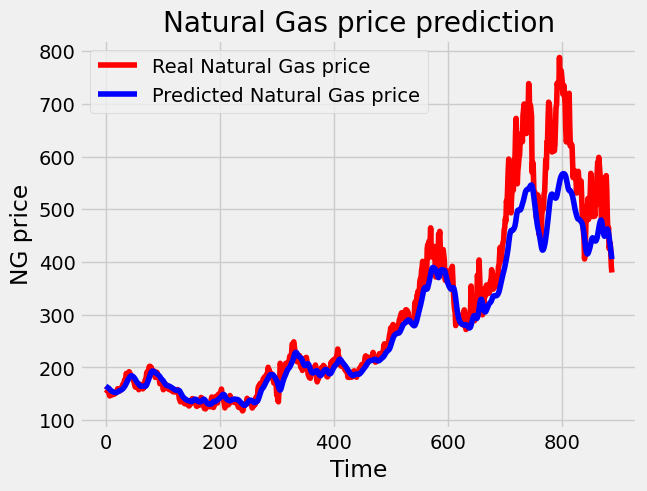

In [36]:
# visualizing the results: predicted vs test

plot_predictions(test, predicted)

In [37]:
return_rmse(test, predicted)

the root mean squared error is : 53.66383520988197.


In [38]:
mean_absolute_percentage_error(test, predicted)

0.07723951119898699